In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from IPython.display import Image

## 1 Задача - ответить на вопрос есть ли связь между жёсткостью воды и средней годовой смертностью?

- Построить точечный график
- Рассчитать коэффициенты корреляции Пирсона и Спирмена
- Построить модель линейной регрессии
- Рассчитать коэффициент детерминации
- Вывести график остатков

In [2]:
df_water = pd.read_csv('water.csv', index_col=0)
df_water[:5]

,location,town,mortality,hardness
1,South,Bath,1247,105
2,North,Birkenhead,1668,17
3,South,Birmingham,1466,5
4,North,Blackburn,1800,14
5,North,Blackpool,1609,18


In [3]:
print('Качество воды в зависимости от уровня жесткости')
display(Image(url='water-ppm.png'))

Качество воды в зависимости от уровня жесткости


Посмотрим зависимость уровня жесткости воды от уровня смертности с помощью точечной диаграммы

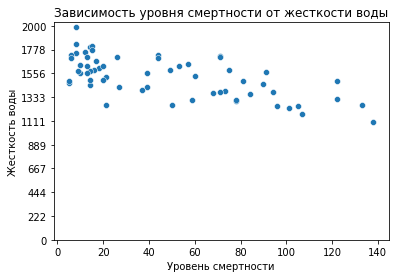

In [4]:
sns.scatterplot(data=df_water, x='hardness', y='mortality')
plt.title("Зависимость уровня смертности от жесткости воды")
plt.xlabel('Уровень смертности')
plt.ylabel('Жесткость воды')
plt.yticks(np.linspace(0, 2000, 10))
plt.show()

На графике можно наблюдать распределение, похожее на линейное обратное распределение.

Посмотрим на базовые статистические меры и проверим имеются ли выбросы.

In [5]:
df_water.describe()

,mortality,hardness
count,61.000000,61.000000
mean,1524.147541,47.180328
std,187.668754,38.093966
min,1096.000000,5.000000
25%,1379.000000,14.000000
50%,1555.000000,39.000000
75%,1668.000000,75.000000
max,1987.000000,138.000000


Стоит отметить достаточно высокое стандартное отклонение, это значит мы имеем дело с очень разнообразным кол-вом значений. По максимальному и минимальному значению уровня жесткости можно сказать, что в целом люди в городах пьют качественную воду за исключением 25-30% людей, которые пьют воду с жесткостью менее 20-30 ppm. Считается, что дистиллированную или близкую к ней воду пить вредно, так как отсутствуют минералы, необходимые для организма человека, а так же чистая вода вымывает дополнительно и уже имеющиеся минералы из организма человека.

Посмотрим гистрограммы распределения значений величин уровня смертности и жесткости воды.

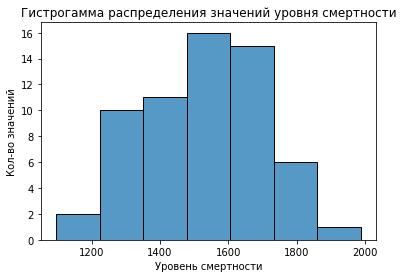

In [6]:
sns.histplot(df_water.mortality)
plt.title('Гистрогамма распределения значений уровня смертности')
plt.xlabel('Уровень смертности')
plt.ylabel('Кол-во значений')
plt.show()

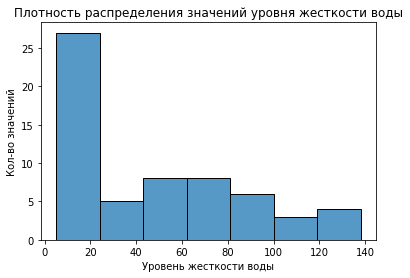

In [7]:
sns.histplot(df_water.hardness)
plt.title('Плотность распределения значений уровня жесткости воды')
plt.xlabel('Уровень жесткости воды')
plt.ylabel('Кол-во значений')
plt.show()

Как видно большинство значений уровня жесткости воды попадает в уровень до 20, это означает, что во многих городах течет вода из под крана почти на уровне дистилированной, что тоже вызывает сомнение. Предполагаем, что вода жесткости ниже 40 может наносить относительный вред человеку, особенно дистиллированная вода с ppm <=5. 

На нашем изображении как раз питьевая вода хорошего качества стартует примерно от 40 ppm. Также исходя из максимального размера жесткости в 138 ppm видно, что в верхней части данных у нас вода считается хорошего качества и даже не жесткой, а на уровне воды из артезианской скважины с угольной фильтрацией и по идее не должна наносить вред человеку. 

Также значения до 20 можно назвать выбросами, удалять из выборки их нельзя, имеет смысл рассмотреть статистические данные для этой группы отдельно. Есть подозрение, что в городах с такими значениями люди пьют воду не из водопровода. Если мы уберем этот выброс, то у нас получатся данные примерно похожие на нормальное распределение и будет примерно похоже, что в этой ситуации люди пьют воду из-под крана.

Рассчитаем коэффициенты корреляции Спирсона и Спирмена. Уровени смертности и жесткости воды можно считать непрерывными величинами, поэтому метод Спирсона будет работать неплохо, но ему может помешать аномальные значения жесткости воды до 20 уровня. Но таких значений у нас почти половина в датасете, поэтому предположительно влияние будет не сильно большое. А на коэффициент корреляции Спирмана выбросы не должны сильно повлиять.

In [8]:
# Коэффициент корреляции Пирсона
df_water[['mortality', 'hardness']].corr()

,mortality,hardness
mortality,1.000000,-0.654849
hardness,-0.654849,1.000000


In [9]:
# Коэффициент корреляции Спирмана
df_water[['mortality', 'hardness']].corr(method='spearman')

,mortality,hardness
mortality,1.000000,-0.631665
hardness,-0.631665,1.000000


Как видно из коэффициентов зависимость смертности от уровня жесткости воды достаточная, но не сильно огромная. У нас получились отрицательные коэфициенты, значит зависимость обратная. Чем выше значение жесткости воды, тем ниже смертность. 

А что произойдет, если мы уберем из датасета города, в которых аномально чистая вода, и заново пересчитаем коэффициенты?

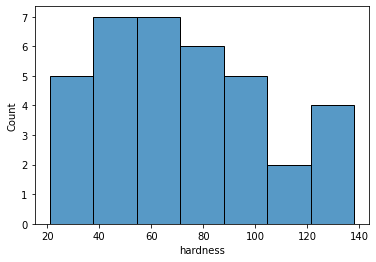

In [10]:
sns.histplot(df_water.hardness[df_water.hardness>20])

In [11]:
# Коэффициент корреляции Пирсона
df_water[df_water.hardness>20][['mortality', 'hardness']].corr()

,mortality,hardness
mortality,1.000000,-0.495797
hardness,-0.495797,1.000000


In [12]:
# Коэффициент корреляции Спирмана
df_water[df_water.hardness>20][['mortality', 'hardness']].corr(method='spearman')

,mortality,hardness
mortality,1.000000,-0.499388
hardness,-0.499388,1.000000


Как видим после удаления аномальных значений жесткости воды у нас произошло снижение корреляционной зависимости.

Посмотрим как изменится точечная диаграмма после удаления значений жесткости воды >20:

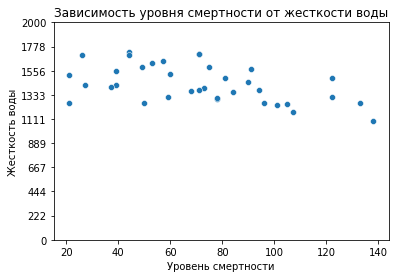

In [13]:
sns.scatterplot(data=df_water[df_water.hardness>20], x='hardness', y='mortality')
plt.title("Зависимость уровня смертности от жесткости воды")
plt.xlabel('Уровень смертности')
plt.ylabel('Жесткость воды')
plt.yticks(np.linspace(0, 2000, 10))
plt.show()

Как видно график уже выглядит так, как будто в данных можно првоести прямую линию с постоянным значением y, а это уже говорит о том, что уровень смертности мало зависит от жесткости воды в случае значений жесткости от 20 до 138.

Построим линейную регресионную модель на основе полного датасета.

Коэффициент а: -3.457219507521319
Коэффициент b: 1694.3947494490756
Значения предсказаний уровня смертности:
[1632.16479831 1524.99099358 1621.79313979 1459.30382294 1497.33323752
 1217.29845741 1511.16211555 1625.2503593  1272.61396953 1566.47762767
 1403.98831082 1604.50704225 1673.6514324  1639.07923733 1379.78777426
 1645.99367634 1652.90811536 1645.99367634 1649.45089585 1486.961579
 1324.47226214 1666.73699339 1666.73699339 1635.62201782 1369.41611574
 1677.10865191 1521.53377407 1383.24499377 1601.04982275 1663.27977388
 1448.93216442 1442.0177254  1666.73699339 1272.61396953 1448.93216442
 1542.27709112 1424.73162786 1649.45089585 1362.50167673 1642.53645684
 1649.45089585 1677.10865191]
Коэффициент детерминации:  0.389489875734762


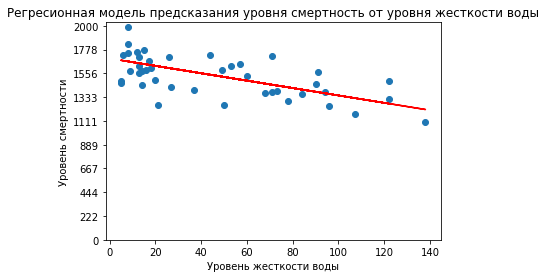

In [14]:
model = LinearRegression()
mortality_test, mortality_train, hardness_test, hardness_train = train_test_split(df_water['mortality'],
                                                                                  df_water[['hardness']],
                                                                                  test_size=0.3,
                                                                                  random_state=42)
model.fit(hardness_train, mortality_train)
print('Коэффициент а:', model.coef_[0])
print('Коэффициент b:', model.intercept_)
mortality_predict = model.predict(hardness_test)
print('Значения предсказаний уровня смертности:')
print(mortality_predict)
print('Коэффициент детерминации: ', model.score(hardness_test, mortality_test))

plt.scatter(hardness_test, mortality_test)
plt.plot(hardness_test, mortality_predict, c='r')
plt.title('Регресионная модель предсказания уровня смертность от уровня жесткости воды')
plt.xlabel('Уровень жесткости воды')
plt.ylabel('Уровень смертности')
plt.yticks(np.linspace(0, 2000, 10))
plt.show()

Как видим коэффициент детерминации по сравнению моделью отклонения от среднего достаточно невысока. 

Попробуем построить модель без аномальных значений уровня жесткости воды.

Коэффициент а: -3.285276317094948
Коэффициент b: 1699.2808314316894
Значения предсказаний уровня смертности:
[1433.17344975 1354.32681814 1630.29002877 1512.02008136 1577.7256077
 1262.33908126 1443.0292787  1554.72867348 1443.0292787  1538.30229189
 1423.3176208  1298.47712075 1459.45566028 1525.16118663 1367.46792341
 1452.88510765 1630.29002877 1403.60596289 1505.44952872 1475.88204187
 1383.89430499 1610.57837087 1571.15505506 1245.91269967 1466.02621292]
Коэффициент детерминации:  0.15294338454788592


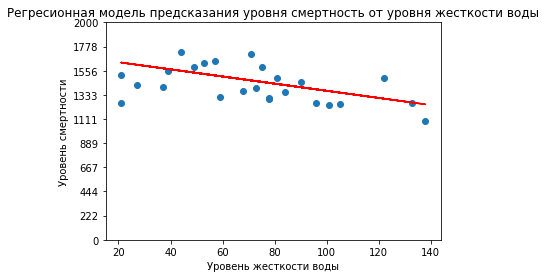

In [15]:
model = LinearRegression()
mortality_test, mortality_train, hardness_test, hardness_train = train_test_split(df_water[df_water.hardness>20]['mortality'],
                                                                                  df_water[df_water.hardness>20][['hardness']],
                                                                                  test_size=0.3,
                                                                                  random_state=42)
model.fit(hardness_train, mortality_train)
print('Коэффициент а:', model.coef_[0])
print('Коэффициент b:', model.intercept_)
mortality_predict = model.predict(hardness_test)
print('Значения предсказаний уровня смертности:')
print(mortality_predict)
print('Коэффициент детерминации: ', model.score(hardness_test, mortality_test))

plt.scatter(hardness_test, mortality_test)
plt.plot(hardness_test, mortality_predict, c='r')
plt.title('Регресионная модель предсказания уровня смертность от уровня жесткости воды')
plt.xlabel('Уровень жесткости воды')
plt.ylabel('Уровень смертности')
plt.yticks(np.linspace(0, 2000, 10))
plt.show()

Как видим коэффициент детерминации уменьшился почти в 3 раза после отсечки городов с уровнем жесткости воды <= 20 и составляет всего 0.15. 

Отсюда можно предположить, что если и есть зависимость уровня смертности от уровня жесткости воды, то ее надо рассматривать с иными характеристиками вместе. Например, чем питается человек в течение дня, какие витамины он пьет или не пьет, а так же уровень загрязнения воздуха и многое другое. У человека может течь из под крана очень жесткая вода, но с помощью угольного фильтра человек может ее очистить. А человек, который пьет дистиллирвоанную воду, может принимать витамины и минералы, и на него это не повлияет. Можно пить витамины и хорошую воду, но люди в целом будут быстро умирать от ядовитых выбросов завода в черте их города. Поэтому по этим данным сложно утверждать, что зависимость реально есть, но и отрицать ее невозможно.

Построим график остатков.

Text(0, 0.5, 'Разница между предсказанием и реальным значением')

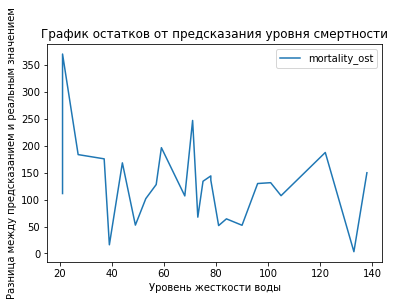

In [16]:
hardness_test['mortality_ost'] = np.abs(mortality_predict-mortality_test)
hardness_test.sort_values(by='hardness').plot('hardness', 'mortality_ost')
plt.title('График остатков от предсказания уровня смертности')
plt.xlabel('Уровень жесткости воды')
plt.ylabel('Разница между предсказанием и реальным значением')

## 2.Сохраняется ли аналогичная зависимость для северных и южных городов по отдельности?

a.Разделить данные на 2 группы  
b.Повторить аналогичные шаги из пункта 1 для каждой группы по отдельности  

In [17]:
df_water_south = df_water[df_water.location == 'South'][['mortality', 'hardness']]
df_water_south[:5]

,mortality,hardness
1,1247,105
3,1466,5
8,1299,78
10,1359,84
11,1392,73


In [18]:
df_water_north = df_water[df_water.location == 'North'][['mortality', 'hardness']]
df_water_north[:5]

,mortality,hardness
2,1668,17
4,1800,14
5,1609,18
6,1558,10
7,1807,15


Посмотрим на базовые статистические метрики в разрезе южны и северных городов

In [19]:
# Южные города
df_water_south.describe()

,mortality,hardness
count,26.000000,26.000000
mean,1376.807692,69.769231
std,140.269175,40.360682
min,1096.000000,5.000000
25%,1259.250000,40.250000
50%,1364.000000,75.500000
75%,1485.750000,99.750000
max,1627.000000,138.000000


In [20]:
# Северные города
df_water_north.describe()

,mortality,hardness
count,35.000000,35.000000
mean,1633.600000,30.400000
std,136.936911,26.134494
min,1378.000000,6.000000
25%,1557.500000,12.500000
50%,1637.000000,17.000000
75%,1718.000000,44.000000
max,1987.000000,94.000000


По базовым метрикам видно, что в южных городах люди пьют более жесткую воду, но она в целом является качественной. А в серверных городах не менее 50% людей пьют воду с жесткостью не более 17 ppm, назвать такую воду качественной уже нельзя. Из этого можно сделать вывод, что в северных городах должен быть уровень смертности повыше, чем в южных, если вода сжесткостью менее 20 ppm действительно влияет отрицательно на организм человека.

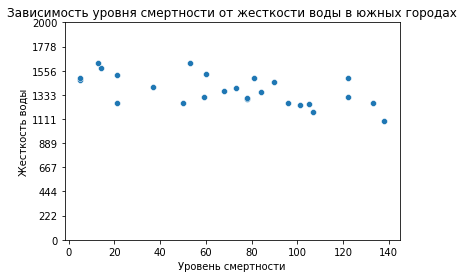

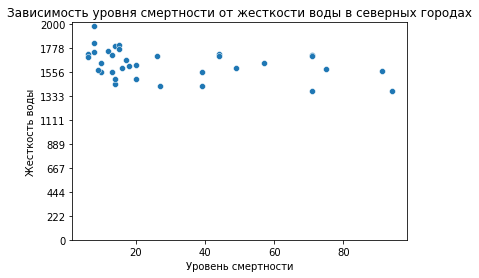

In [21]:
sns.scatterplot(data=df_water_south, x='hardness', y='mortality')
plt.title("Зависимость уровня смертности от жесткости воды в южных городах")
plt.xlabel('Уровень смертности')
plt.ylabel('Жесткость воды')
plt.yticks(np.linspace(0, 2000, 10))
plt.show()

sns.scatterplot(data=df_water_north, x='hardness', y='mortality')
plt.title("Зависимость уровня смертности от жесткости воды в северных городах")
plt.xlabel('Уровень смертности')
plt.ylabel('Жесткость воды')
plt.yticks(np.linspace(0, 2000, 10))
plt.show()

Как видно из точечных графиков в северных городах действительно смертность немного выше. При этом если рассматривать уровни жесткости воды ppm до 20 на обоих графиках, то по какой-то причине люди пьющие почти дистиллированную воду в южных городах имеют немного ниже смертность. Уже можно делать предположения, что на смертность могут влиять другие факторы и нельзя рассматривать только воду. Так как и там, и там есть города с никим значением ppm воды и уровень смертности в них различается.

Рассмотрим гистограммы значений уровня смертности и жесткости воды в южных и северных городах.

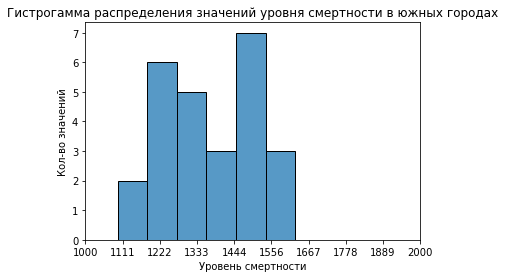

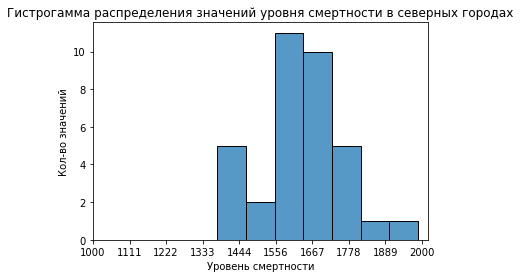

In [22]:
sns.histplot(df_water_south.mortality)
plt.title('Гистрогамма распределения значений уровня смертности в южных городах')
plt.xlabel('Уровень смертности')
plt.ylabel('Кол-во значений')
plt.xticks(np.linspace(1000, 2000, 10))
plt.show()

sns.histplot(df_water_north.mortality)
plt.title('Гистрогамма распределения значений уровня смертности в северных городах')
plt.xlabel('Уровень смертности')
plt.ylabel('Кол-во значений')
plt.xticks(np.linspace(1000, 2000, 10))
plt.show()

Как видно действительно в серверных городах уровень смертности выше, график смещен в правую часть.

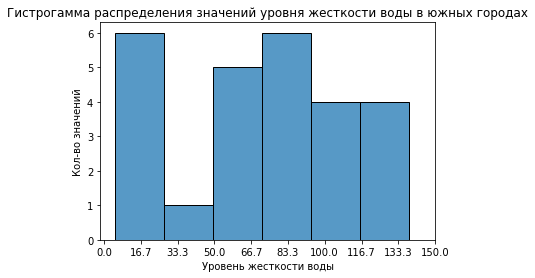

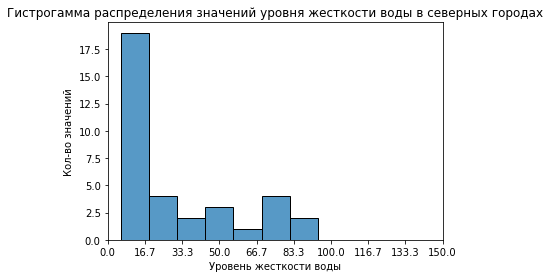

In [23]:
sns.histplot(df_water_south.hardness)
plt.title('Гистрогамма распределения значений уровня жесткости воды в южных городах')
plt.xlabel('Уровень жесткости воды')
plt.ylabel('Кол-во значений')
plt.xticks(np.linspace(0, 150, 10))
plt.show()

sns.histplot(df_water_north.hardness)
plt.title('Гистрогамма распределения значений уровня жесткости воды в северных городах')
plt.xlabel('Уровень жесткости воды')
plt.ylabel('Кол-во значений')
plt.xticks(np.linspace(0, 150, 10))
plt.show()

Как видно из графиков дейсвтительно в северных городах люди в большинстве своём пьют воду крайне бедную на минералы. В связи с этим сдвиг значений в гистограмме по уровню смертности у северных городов в сторону увеличения можно объяснить некачественной водой.

In [24]:
# Коэффициент корреляции Пирсона для южных городов
df_water_south[['mortality', 'hardness']].corr()

,mortality,hardness
mortality,1.000000,-0.602153
hardness,-0.602153,1.000000


In [25]:
# Коэффициент корреляции Спирмана для южных городов
df_water_south[['mortality', 'hardness']].corr(method='spearman')

,mortality,hardness
mortality,1.000000,-0.595723
hardness,-0.595723,1.000000


In [26]:
# Коэффициент корреляции Пирсона для северных городов
df_water_north[['mortality', 'hardness']].corr()

,mortality,hardness
mortality,1.000000,-0.368598
hardness,-0.368598,1.000000


In [27]:
# Коэффициент корреляции Спирмана для северных городов
df_water_north[['mortality', 'hardness']].corr(method='spearman')

,mortality,hardness
mortality,1.000000,-0.404208
hardness,-0.404208,1.000000


Ранее мы получали значения коэфициентов около 0.49. Сейчас видно, что коэфициенты для южных городов  подросли на 0.1, а для северных городов наоборот упали примерно на 0.1. В связи с этим можно предположить, что оценивать данные смертности только по жесткости воды - сомнительная затея. Вроде бы у северных городов явно смертность повыше, пьют они менее качестенную воду, но коэффициент коррелиции заметно снизился.

Коэффициент а: -0.5392432068268586
Коэффициент b: 1403.834970806198
Значения предсказаний уровня смертности:
[1375.25508084 1392.51086346 1361.77400067 1396.28556591 1346.13594768
 1358.53854143 1364.47021671 1396.82480912 1355.30308219 1371.4803784
 1349.37140692 1360.15627105 1376.87281046 1352.06762295 1329.41940826
 1332.1156243  1367.16643274 1361.77400067]
Коэффициент детерминации:  0.1703346332829898


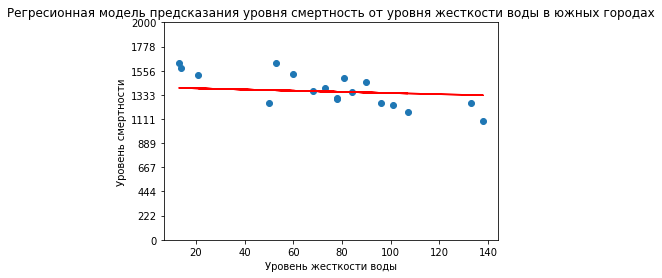

In [28]:
model = LinearRegression()
mortality_test, mortality_train, hardness_test, hardness_train = train_test_split(df_water_south['mortality'],
                                                                                  df_water_south[['hardness']],
                                                                                  test_size=0.3,
                                                                                  random_state=42)
model.fit(hardness_train, mortality_train)
print('Коэффициент а:', model.coef_[0])
print('Коэффициент b:', model.intercept_)
mortality_predict = model.predict(hardness_test)
print('Значения предсказаний уровня смертности:')
print(mortality_predict)
print('Коэффициент детерминации: ', model.score(hardness_test, mortality_test))

plt.scatter(hardness_test, mortality_test)
plt.plot(hardness_test, mortality_predict, c='r')
plt.title('Регресионная модель предсказания уровня смертность от уровня жесткости воды в южных городах')
plt.xlabel('Уровень жесткости воды')
plt.ylabel('Уровень смертности')
plt.yticks(np.linspace(0, 2000, 10))
plt.show()

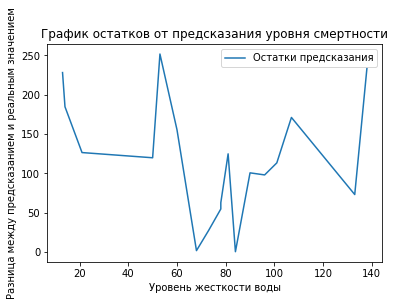

In [29]:
hardness_test['mortality_ost'] = np.abs(mortality_predict-mortality_test)
hardness_test.sort_values(by='hardness').plot('hardness', 'mortality_ost')
plt.title('График остатков от предсказания уровня смертности')
plt.xlabel('Уровень жесткости воды')
plt.ylabel('Разница между предсказанием и реальным значением')
plt.legend(labels=['Остатки предсказания'])
plt.show()

Коэффициент а: -1.4700145863721603
Коэффициент b: 1693.4030839758284
Значения предсказаний уровня смертности:
[1664.00279225 1668.41283601 1671.35286518 1681.64296728 1672.82287977
 1678.70293811 1555.22171286 1672.82287977 1666.94282142 1589.03204834
 1678.70293811 1674.29289435 1674.29289435 1609.61225255 1628.72244218
 1684.58299646 1655.18270473 1621.37236924 1675.76290894 1653.71269014
 1589.03204834 1664.00279225 1559.63175662 1583.15199   ]
Коэффициент детерминации:  0.14900378756159305


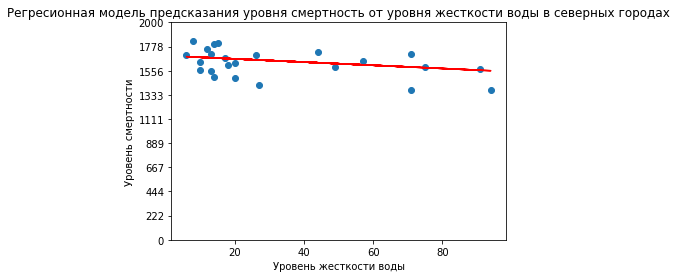

In [30]:
model = LinearRegression()
mortality_test, mortality_train, hardness_test, hardness_train = train_test_split(df_water_north['mortality'],
                                                                                  df_water_north[['hardness']],
                                                                                  test_size=0.3,
                                                                                  random_state=42)
model.fit(hardness_train, mortality_train)
print('Коэффициент а:', model.coef_[0])
print('Коэффициент b:', model.intercept_)
mortality_predict = model.predict(hardness_test)
print('Значения предсказаний уровня смертности:')
print(mortality_predict)
print('Коэффициент детерминации: ', model.score(hardness_test, mortality_test))

plt.scatter(hardness_test, mortality_test)
plt.plot(hardness_test, mortality_predict, c='r')
plt.title('Регресионная модель предсказания уровня смертность от уровня жесткости воды в северных городах')
plt.xlabel('Уровень жесткости воды')
plt.ylabel('Уровень смертности')
plt.yticks(np.linspace(0, 2000, 10))
plt.show()

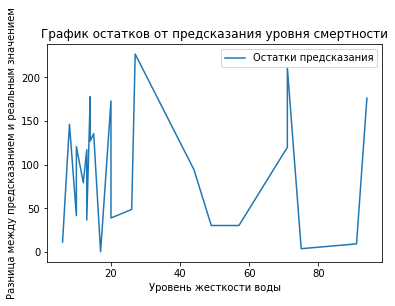

In [31]:
hardness_test['mortality_ost'] = np.abs(mortality_predict-mortality_test)
hardness_test.sort_values(by='hardness').plot('hardness', 'mortality_ost')
plt.title('График остатков от предсказания уровня смертности')
plt.xlabel('Уровень жесткости воды')
plt.ylabel('Разница между предсказанием и реальным значением')
plt.legend(labels=['Остатки предсказания'])
plt.show()

Как видно из полученных моделей коэфициент детерминации крайне низок и даже хуже, чем в полной выборке без деления. А линейная регрессия больше напоминает прямую с постоянным значением уровня смертности.

# ВЫВОДЫ

1. Нельзя однозначно сказать повлиял ли уровнь жесткости воды на уровень смертности в городах, жесткость воды следует рассматривать с другими признаками, влияющими на качество жизни человека.

2. Повышенная смертность в северных городах по сравнению с южными может объясняться другими причинами, например, выбросами с заводов.

3. Нельзя утверждать от отсутствии влияния жесткости воды на уровень смертности.